# Conjoint Analysis

## Introduction

Conjoint analysis is a technique that allows researchers to predict consumers' choice share. The analysis can be programmed using standard question types, such as the MaxDiff variation of the Matrix Table question. Instead of directly asking the survey respondents which attributes they find most relevant, conjoint analysis asks respondents to evaluate potential product profiles which include multiple product features 

There are several ways to show to respondents the product profiles. In Choice-Based Conjoint (CBC) respondents are shown multiple product conceptsn and asked which option they would choose. By varying the features shown to the respondents and observing their responses to the product profiles, one can statistically deduce the most desired product features and which attributes have the most impact on choice. 

The end result is a set of preference scores or *part-worth utilities* for each level of each attribute.

### MaxDiff

MaxDiff is a technique for obtaining preference or importance scores for multiple items. Respondents are shown a subset of the possible items in the exercise and asked to indicate the best and worst items. Item scores are typically estimated for each individual via hierarchical Bayes (HB) methods.

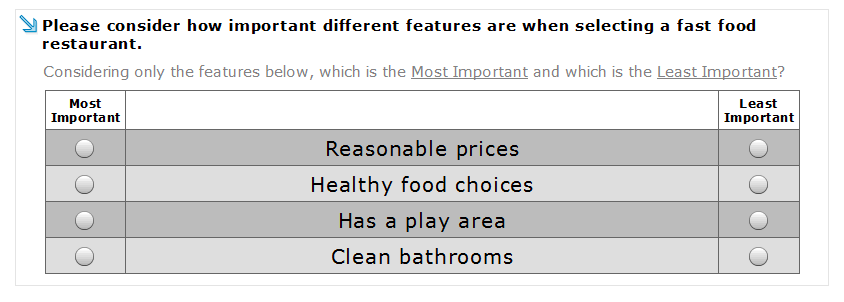

In [97]:
from IPython.display import Image
Image(filename='MaxDiff.png')

# Conjoint Code I

In [1]:
from __future__ import division, print_function
import pandas as pd  
import numpy as np 
import statsmodels.api as sm 
import statsmodels.formula.api as smf  
from patsy.contrasts import Sum
import matplotlib.pyplot as plt
%matplotlib inline

The design of the survey is complex for several reasons. For example, in our simple case the attributes are:

The attributes of the product are:
    - 3 photography features which the user can use (editing, filtering and collage\footnote{Artwork which is made from an assemblage of different forms.})
    - 3 UI (mobile, Desktop or VR)
    - 3 content sources (sharing quality content on the user's social media profiles is an efficient way to engage with followers). Examples are:
        - BuzzSumo which enables users to search for relevant content using popular keywords and provides content based on social shares;
        - Reddit which is a social networking website spanning all kinds of topics and provides the most engaging content, pictures, videos and other online occurrences;
        - Pocket, a content finder app that can be used for searching online articles and saving them to read later.
    - 3 shares (e.g. the best social media apps offer solutions for the user to share information across several social networks)
    - 3 so-called differentiations(a kind of special sauce which differentiates the app from it competitors)

The total number of combinations is 

\begin{eqnarray}
{\rm{total}} = 3^5\times 2 = 486,
\end{eqnarray}

which is far too many for a consumer to rank (see picture below for a typical choice task).

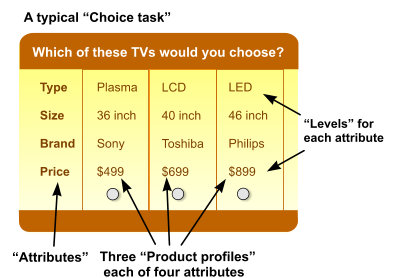

In [5]:
from IPython.display import Image
Image(filename='conjoint_terms.jpg')

Let us now create 3 Pandas DataFrames containing the data from our files.

In [6]:
myConjointDataR = pd.read_csv('conjoint-r.csv')
myConjointDataLevelNames = pd.read_csv('conjoint-r-level-names.csv')
myConjointDataProfileMatrix = pd.read_csv('conjoint-r-profiles-matrix.csv')

We want to find out from users which of the attributes above they were most interested in. Each attribute has multiple layers. The photography e.g. feature has three layers:

    - Editing
    - Filtering
    - Collage

This is what a user could potentially do with the photography functionality on the social media platform. They can do one of these three pieces of functionality with photography. The levels of all attributes are contained in the following Pandas DataFrame.

In [7]:
myConjointDataLevelNames

,levels
0,edit
1,filter
2,collage
3,content_source_one
4,content_source_two
5,content_type_one
6,content_type_two
7,content_type_three
8,ux1
9,ux2


The next table shows our 500 observations (500 users) and six profiles (or combinations of attributes). We see that the different combinations or `profiles` that we tested for, were just six in all. 

In [4]:
myConjointDataR

,profile1,profile2,profile3,profile4,profile5,profile6
0,2,1,4,2,3,3
1,4,3,5,1,1,3
2,3,4,1,2,3,2
3,1,2,3,1,3,2
4,2,3,2,3,3,2
5,4,4,4,2,2,3
6,3,2,3,4,2,3
7,5,1,4,2,3,2
8,2,3,4,4,2,2
9,1,1,2,3,2,1


In the following DataFrame, the full dataset was aggregated and instead of 486 potential combinations we ended up with only 11. The reason there are 11 rows in this table in comparison with the table 

    myConjointDataProfilesMatrix
    
in our `R` code is because of hot-encoding. E.g. though there are three photos levels, only $(P1,P2)=(1,0),(0,1)$ are considered to avoid multicolinearity. To understand why there are twice as many lines we notice that the first two differ by the values of $U1$ and $U2$ which are interchanged. For example suppose `Desktop` (which corresponds to $U=2$) was the chosen UI. Instead of setting $U=2$, hot-encoding creates the pairs of values $(U1,U2)=(0,1)$ where $U1=0$ means "not U1". 

In [8]:
myConjointData = pd.read_csv('conjoint-py.csv')
myConjointData

,Rank,P1,P2,U1,U2,D1,D2,D3
0,7,1,0,1,0,1,0,0
1,6,1,0,0,1,1,0,0
2,8,0,1,1,0,1,0,0
3,1,0,1,0,1,1,0,0
4,10,1,0,1,0,0,1,0
5,3,1,0,0,1,0,1,0
6,4,0,1,1,0,0,1,0
7,2,0,1,0,1,0,1,0
8,9,1,0,1,0,0,0,1
9,12,1,0,0,1,0,0,1


We rename the columns for clarity. The first lines e.g. says a profile with features `PhotoF1`, `Ux1` and `SpecialSauce1` is ranked in 7th. We then use a hash table or Python dictionary.

In [55]:
names = {"Rank":"Rank", "P1": "PhotoF1","P2": "PhotoF2", "U1": "Ux1", \
         "U2": "Ux2", "D1":"SpecialSauce1", \
         "D2":"SpecialSauce2", "D3":"SpecialSauce3"\
        }

myConjointData.rename(columns = names, inplace=True)

myConjointData

,Rank,PhotoF1,PhotoF2,Ux1,Ux2,SpecialSauce1,SpecialSauce2,SpecialSauce3
0,7,1,0,1,0,1,0,0
1,6,1,0,0,1,1,0,0
2,8,0,1,1,0,1,0,0
3,1,0,1,0,1,1,0,0
4,10,1,0,1,0,0,1,0
5,3,1,0,0,1,0,1,0
6,4,0,1,1,0,0,1,0
7,2,0,1,0,1,0,1,0
8,9,1,0,1,0,0,0,1
9,12,1,0,0,1,0,0,1


Each of these columns, with the exception of `Rank`, corresponds to a variable $X_i$ with $i=1,2,...,7$.
The dependent variable is $y$ = `myContjointData.rank` and we are going to generate a linear multiple regression model.
So I'm going to first assign a variable, call it `myLinearRegressionForConjoint` and then, again, we're going to call this `sm` method from one of our packages above.

In [12]:
X = myConjointData[['PhotoF1', 'PhotoF2', 'Ux1', 'Ux2', 'SpecialSauce1', \
                    'SpecialSauce2', 'SpecialSauce3']]              
# Assign a constant
X = sm.add_constant(X)
# Assign our resulting test data to the y
Y = myConjointData.Rank

Using a linear regression we find that `SpecialSauce3` is the most important input.

In [14]:
# Perform a linear regression model 
myLRforConjoint = sm.OLS(Y,X).fit()
myLRforConjoint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4.232
Date:                Fri, 12 Jan 2018   Prob (F-statistic):             0.0471
Time:                        12:56:14   Log-Likelihood:                -24.520
No. Observations:                  12   AIC:                             59.04
Df Residuals:                       7   BIC:                             61.46
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             2.7857      0.302      9.211      0.000         2.071     3.501
PhotoF1           2.7262      0.722      3.777      0.007         1.020     4.433
PhotoF2           0.0595      0.722      0.082      0.937        -1.647     1.766
Ux1               3.0595      0.722      4.239      0.004         1.353     4.766
Ux2              -0.2738      0.722     -0.379      0.716        -1.980     1.433
SpecialSauce1    -0.0714      1.003     -0.071      0.945        -2.443     2.301
SpecialSauce2    -0.8214      1.003     -0.819      0.440        -3.193     1.551
SpecialSauce3     3.6786      1.003      3.667      0.008         1.307     6.051
==============================================================================
Omnibus:                        0.944   Durbin-Watson:                   2.685
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.660
Skew:                           0.092   Prob(JB):                        0.719
Kurtosis:                       1.866   Cond. No.                     2.37e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.96e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Part worth values & relative importance of features

**Part-worths**: they are scaled to an (arbitrary) additive constant within each attribute. The arbitrary origin on the scaling within each of the attribute depends on the dummy coding. When we use "effects coding", utilities are scaled to sum to 0 within each attribute. A plausible set of part-worth utilities for miles per gallon might look like:

    30 MPG   -1.0
    40 MPG    0.0
    50 MPG    1.0
    
Other kinds of dummy coding arbitrarily set the part-worth of one level within each attribute to zero and estimate the remaining levels as contrasts with respect to zero. Again, the same cautions regarding interpretation apply. Whether we multiply all the part-worth utilities by a positive constant or add a constant to each level within a study, the interpretation is the same. Suppose we have two attributes with the following utilities:

 

    Blue   30     Brand A  20

    Red    20     Brand B  40

    Green  10     Brand C  10

 

The increase in preference from Green to Blue (20 points) is equal to the increase in preference between Brand A and Brand B (also 20 points). However, due to the arbitrary origin within each attribute, we cannot directly compare values between attributes to say that Red (20 utiles) is preferred equally to Brand A (20 utiles). And even though we are comparing utilities within the same attribute, we cannot say that Blue is three times as preferred as Green (30/10). Interval data do not support ratio operations.

**Counts:** When using Choice-Based Conjoint (CBC), the researcher can analyze the data by counting the number of times an attribute level was chosen relative to the number of times it was available for choice. Counts proportions are closely related to conjoint utilities. Consider the following counts proportions:


    Blue    30/(30+20+10) = 0.50     Brand A  0.40

    Red     20/(30+20+10) = 0.30     Brand B  0.50

    Green   10/(30+20+10) = 0.20     Brand C  0.10

 

We can say that Brand A was chosen 4 times as often as Brand C (.40/.10). As with conjoint utilities, we cannot report that Brand A is preferred to Red.

**Importance of each attribute**: to characterize the relative importance of each attribute we consider how much difference each attribute could make in the total utility of a product. That difference is the range in the attribute's utility values. We percentage those ranges, obtaining a set of attribute importance values that add to 100, as follows:

                                   Percent

                                Range     Importance

      Brand (B - C)          60 - 20 = 40    26.7

      Color (Red - Pink)     20 -  0 = 20    13.3

      Price ($50 - $100)     90 -  0 = 90    60.0

                              ----    ----

                              150     100.0

 

For this respondent, the importance of Brand is 26.7%, the importance of Color is 13.3%, and the importance of Price is 60%. Importances depend on the particular attribute levels chosen for the study. For example, with a narrower range of prices, Price would have been less important.

**Important**: When calculating importances from CBC data, we suggest using utilities resulting from Latent Class (with multiple segments) or HB estimation, if there are attributes on which respondents disagree about preference order.

Summarizing:
\begin{eqnarray}
\begin{array}{l}
{\rm{attribute\,\, }}{\rm{ importance }} = \,\,\max ({\beta _i}) - \min ({\beta _i})\\
{\rm{relative\,\, attribute\,\, }}{\rm{ importance }} = \frac{{\max ({\beta _i}) - \min ({\beta _i})}}{{\sum\limits_j {\max ({\beta _j}) - \min ({\beta _j})} }}
\end{array}
\end{eqnarray}

** Reminders:** Linear Regression and plotting using `statsmodel`.

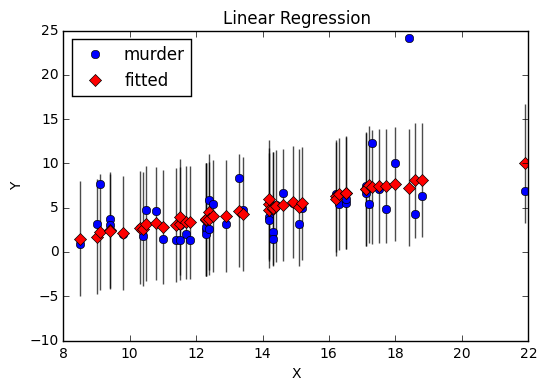

In [99]:
import numpy as np
import statsmodels.api as sm
data = sm.datasets.statecrime.load_pandas().data
murder = data['murder']
X = data[['poverty', 'hs_grad']]
X["constant"] = 1
y = murder
model = sm.OLS(y, X)
results = model.fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results,0, ax=ax)
ax.set_ylabel("Y")
ax.set_xlabel("X")
ax.set_title("Linear Regression")

In [96]:
importance = []
relative_importance = []
rangePerFeature = []
pwr = []

begin = "P"   #first letter of the first feature (which is a string)
tempRange = []
for feature in names.keys():
    print ("feature is: ", feature)
    if feature[0] == begin:
        tempRange.append(myLRforConjoint.params[names[feature]])
    elif feature == "Rank":
        rangePerFeature.append(tempRange)
        print ("rangePerFeature is: ", rangePerFeature)
    else:
        rangePerFeature.append(tempRange)
        begin = feature[0]
        tempRange = [myLRforConjoint.params[names[feature]]]
print("rangePerFeature is: ", rangePerFeature)


for item in rangePerFeature[1:]:
    importance.append(max(item) - min(item))
    print ("item is:",item)
for item in importance:
    relative_importance.append(100* round(item/sum(importance),3))
    print ("relative_importance is:",100* round(item/sum(importance),3))

feature is:  P2
feature is:  P1
feature is:  D2
feature is:  D1
feature is:  U1
feature is:  D3
feature is:  Rank
rangePerFeature is:  [[0.059523809523807647, 2.7261904761904772], [-0.82142857142857184, -0.071428571428573673], [3.0595238095238098], [3.6785714285714302]]
feature is:  U2
rangePerFeature is:  [[0.059523809523807647, 2.7261904761904772], [-0.82142857142857184, -0.071428571428573673], [3.0595238095238098], [3.6785714285714302], [3.6785714285714302]]
item is: [-0.82142857142857184, -0.071428571428573673]
item is: [3.0595238095238098]
item is: [3.6785714285714302]
item is: [3.6785714285714302]
relative_importance is: 100.0
relative_importance is: 0.0
relative_importance is: 0.0
relative_importance is: 0.0


In [ ]:
partworths = []

item_levels = [1,2,3,4,5,6,7]

for i in range(1,7):
    part_worth_range = myLRforConjoint.params[item_levels[i-1]:item_levels[i]]
    pwr.append(part_worth_range[0])
    print("part_worth_range is:", part_worth_range)
    print("pwr:", pwr)

        
print("importance is:", importance)
print("relative_importance is:", relative_importance)
print("rangePerFeature is:", rangePerFeature)
print("pwr is:", pwr)

In [62]:
features.index('PhotoF1')

0

In [64]:
print(part_worth_range)

SpecialSauce2   -0.821429
dtype: float64


In [80]:
dict = {}
features = ['PhotoF1', 'PhotoF2', 'Ux1', 'Ux2', 'SpecialSauce1','SpecialSauce2', 'SpecialSauce3'] 
for idx,item in enumerate(features[0:-1]):
    print(idx,item)
    dict[item] = pwr[idx]
print(dict)

0 PhotoF1
1 PhotoF2
2 Ux1
3 Ux2
4 SpecialSauce1
5 SpecialSauce2
{'Ux2': -0.2738095238095255, 'SpecialSauce2': -0.82142857142857184, 'SpecialSauce1': -0.071428571428573673, 'Ux1': 3.0595238095238098, 'PhotoF1': 2.7261904761904772, 'PhotoF2': 0.059523809523807647}


In [52]:
print(rangePerFeature[4][0])
print(rangePerFeature[4][0])
print(rangePerFeature[3][0])
print(rangePerFeature[1][1])

3.67857142857
3.05952380952
2.72619047619


In [56]:
names

{'D1': 'SpecialSauce1',
 'D2': 'SpecialSauce2',
 'D3': 'SpecialSauce3',
 'P1': 'PhotoF1',
 'P2': 'PhotoF2',
 'Rank': 'Rank',
 'U1': 'Ux1',
 'U2': 'Ux2'}

In [53]:
# Normalize values for each feature 
raw = [3.67,3.05,2.72]
norm = [float(i)/sum(raw) for i in raw]
norm

[0.388771186440678, 0.323093220338983, 0.288135593220339]

(-1.0134992223278581,
 1.0115396799001157,
 -1.1052079951930152,
 1.0190809061436532)

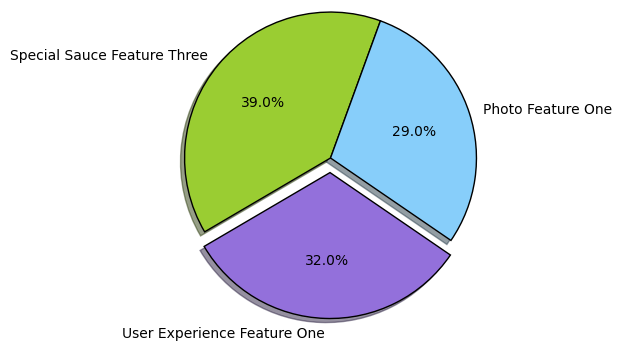

In [54]:
# Graph our winning product features

labels = 'Special Sauce Feature Three', 'User Experience Feature One', 'Photo Feature One'
sizes = [39, 32, 29]
colors = ['yellowgreen', 'mediumpurple', 'lightskyblue'] 
explode = (0, 0.1, 0)    
plt.pie(sizes,              
        explode=explode,   
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        shadow=True,        
        startangle=70       
        )

plt.axis('equal')

# Conjoint Code II

In [17]:
from __future__ import division, print_function
import pandas as pd  
import numpy as np 
import statsmodels.api as sm 
import statsmodels.formula.api as smf  
from patsy.contrasts import Sum

conjoint_data_frame = pd.read_csv('mobile_services_ranking.csv')

### 1) Problem: Assessing mobile phone services

### 2) Attributes:

    - The mobile provider or brand
    - Startup and monthly costs
    - If the provider offered 4G services in the area
    - Whether the provider had a retail location nearby
    - Whether the provider supported Apple, Samsung, or Nexus phones in addition to tablet computers.

### 3) Product profiles 

Product profiles are combinations of the attributes and are shown below. There are a total of 16 product profiles which are presented in random order to the consumer.

In [21]:
conjoint_data_frame

,brand,startup,monthly,service,retail,apple,samsung,google,ranking
0,"""AT&T""","""$100""","""$100""","""4G NO""","""Retail NO""","""Apple NO""","""Samsung NO""","""Nexus NO""",11
1,"""Verizon""","""$300""","""$100""","""4G NO""","""Retail YES""","""Apple YES""","""Samsung YES""","""Nexus NO""",12
2,"""US Cellular""","""$400""","""$200""","""4G NO""","""Retail NO""","""Apple NO""","""Samsung YES""","""Nexus NO""",9
3,"""Verizon""","""$400""","""$400""","""4G YES""","""Retail YES""","""Apple NO""","""Samsung NO""","""Nexus NO""",2
4,"""Verizon""","""$200""","""$300""","""4G NO""","""Retail NO""","""Apple NO""","""Samsung YES""","""Nexus YES""",8
5,"""Verizon""","""$100""","""$200""","""4G YES""","""Retail NO""","""Apple YES""","""Samsung NO""","""Nexus YES""",13
6,"""US Cellular""","""$300""","""$300""","""4G YES""","""Retail NO""","""Apple YES""","""Samsung NO""","""Nexus NO""",7
7,"""AT&T""","""$400""","""$300""","""4G NO""","""Retail YES""","""Apple YES""","""Samsung NO""","""Nexus YES""",4
8,"""AT&T""","""$200""","""$400""","""4G YES""","""Retail NO""","""Apple YES""","""Samsung YES""","""Nexus NO""",5
9,"""T-Mobile""","""$400""","""$100""","""4G YES""","""Retail NO""","""Apple YES""","""Samsung YES""","""Nexus YES""",16


### 4) Goal 

The goal is to fit the preference rankings to show how product attributes affect purchasing decisions.

### 5) Procedure

Product profiles, defined by their attributes, are shown to consumers. By the ranking consumers reveal their preferences for:

    - The products 
    - The corresponding attributes that define products
    
The computed attribute importance values and part-worths associated with levels of attributes are obtained as a group (or jointly). We will utilize sum contrasts. The sum of the fitted regression coefficients across the levels of each attribute is zero by construction. The fitted regression coefficients represent (conjoint) measures of utility called **part-worths**:

     - Part-worths are the coefficients of the regression and measure the utilities.
     - Part-worths reflect the strength of individual consumer preferences for each level of each attribute in the study. 
     - Positive part-worths add to a product's value in the mind of the consumer. 
     - Negative part-worths subtract from that value. 
     - Summing across the part-worths of a product, we obtain the utility. 
     - The relative importance of attributes is defined using the ranges of part-worth within attributes.
     
The linear model fit to conjoint rankings can be used to predict what the consumer is likely to do about mobile communications in the future. More concretely, we fit a linear model to each individual's ratings or rankings, hence measuring the utility or part-worth of each level of each attribute, as well as the relative importance of attributes. 

Conjoint measures can be used to predict each individual's choices in the marketplace. and perform marketplace simulations, exploring alternative product designs and pricing policies.

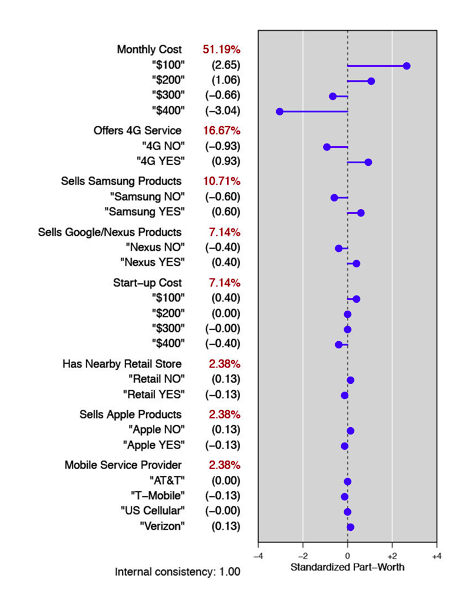

In [23]:
from IPython.display import Image
Image(filename='spinechart.png')

The spine chart shows that:

    - Monthly cost has considerable importance. 
    - Next is 4G availability. 
    - Start-up cost, since it is a one-time cost, is much less important than monthly cost. 
    - This consumer ranks the four service providers about equally. 
    - Having a nearby retail store is not an advantage. 
    - Consumer probably is an Android user because we see higher importance for service providers that offer Samsung phones and tablets first and Nexus second, while the availability of Apple phones and tablets is irrelevant. 

### 6) Python Code


6.1) We set up sum contrasts for effects coding as needed for conjoint analysis using `C(effect, Sum)` notation within main effects model specification

6.2) We then fit the linear regression model using the syntax:

        model = sm.ols(y,x)
        results = model.fit()

In [27]:
main_effects_model = 'ranking ~ C(brand, Sum) + C(startup, Sum) +  \
    C(monthly, Sum) + C(service, Sum) + C(retail, Sum) + C(apple, Sum) + \
    C(samsung, Sum) + C(google, Sum)'

# 
main_effects_model_fit = smf.ols(main_effects_model, data = conjoint_data_frame).fit()
main_effects_model_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Wed, 10 Jan 2018   Prob (F-statistic):             0.0794
Time:                        10:16:12   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                           8.5000      0.125     68.000      0.009         6.912    10.088
C(brand, Sum)[S."AT&T"]          2.442e-15      0.217   1.13e-14      1.000        -2.751     2.751
C(brand, Sum)[S."T-Mobile"]        -0.2500      0.217     -1.155      0.454        -3.001     2.501
C(brand, Sum)[S."US Cellular"]   5.551e-15      0.217   2.56e-14      1.000        -2.751     2.751
C(startup, Sum)[S."$100"]           0.7500      0.217      3.464      0.179        -2.001     3.501
C(startup, Sum)[S."$200"]       -6.439e-15      0.217  -2.97e-14      1.000        -2.751     2.751
C(startup, Sum)[S."$300"]        5.773e-15      0.217   2.67e-14      1.000        -2.751     2.751
C(monthly, Sum)[S."$100"]           5.0000      0.217     23.094      0.028         2.249     7.751
C(monthly, Sum)[S."$200"]           2.0000      0.217      9.238      0.069        -0.751     4.751
C(monthly, Sum)[S."$300"]          -1.2500      0.217     -5.774      0.109        -4.001     1.501
C(service, Sum)[S."4G NO"]         -1.7500      0.125    -14.000      0.045        -3.338    -0.162
C(retail, Sum)[S."Retail NO"]       0.2500      0.125      2.000      0.295        -1.338     1.838
C(apple, Sum)[S."Apple NO"]         0.2500      0.125      2.000      0.295        -1.338     1.838
C(samsung, Sum)[S."Samsung NO"]    -1.1250      0.125     -9.000      0.070        -2.713     0.463
C(google, Sum)[S."Nexus NO"]       -0.7500      0.125     -6.000      0.105        -2.338     0.838
==============================================================================
Omnibus:                       30.796   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.667
Skew:                           0.000   Prob(JB):                        0.264
Kurtosis:                       1.000   Cond. No.                         2.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6.3) We then build a list with the attributes:   

In [28]:
conjoint_attributes = ['brand', 'startup', 'monthly', 'service','retail', 'apple', 'samsung', 'google']

In [50]:
conjoint_data_frame.head(1)

,brand,startup,monthly,service,retail,apple,samsung,google,ranking
0,"""AT&T""","""$100""","""$100""","""4G NO""","""Retail NO""","""Apple NO""","""Samsung NO""","""Nexus NO""",11


In [60]:
print(conjoint_data_frame.iloc[:,0])

0            "AT&T"
1         "Verizon"
2     "US Cellular"
3         "Verizon"
4         "Verizon"
5         "Verizon"
6     "US Cellular"
7            "AT&T"
8            "AT&T"
9        "T-Mobile"
10    "US Cellular"
11       "T-Mobile"
12       "T-Mobile"
13    "US Cellular"
14       "T-Mobile"
15           "AT&T"
Name: brand, dtype: object


In [58]:
print(np.unique(conjoint_data_frame.iloc[:,0]))
print(list(np.unique(conjoint_data_frame.iloc[:,0])))
print(len(list(np.unique(conjoint_data_frame.iloc[:,0]))))

['"AT&T"' '"T-Mobile"' '"US Cellular"' '"Verizon"']
['"AT&T"', '"T-Mobile"', '"US Cellular"', '"Verizon"']
4


6.4) Next we build part-worth information one attribute at a time:

In [69]:
conjoint_attributes = ['brand', 'startup', 'monthly', 'service','retail', 'apple', 'samsung', 'google']
level_name = []
part_worth = []
part_worth_range = []
end = 1  # initialize index for coefficient in params
for item in conjoint_attributes:
    print (item)
    print ("np.unique(conjoint_data_frame[item])) is: ", np.unique(conjoint_data_frame[item]))
    nlevels = len(list(np.unique(conjoint_data_frame[item])))
    print (nlevels)
    aux = np.unique(conjoint_data_frame[item])
    print ("aux is: ", aux)
    level_name.append(list(aux)) 
    print ("list(aux) is: ", list(aux))
    print ("level_name is: ", level_name)
    begin = end 
    end = begin + nlevels - 1
    print ("end is:", end)
    new_part_worth = list(main_effects_model_fit.params[begin:end])
    print ("new_part_worth is:", new_part_worth)
    new_part_worth.append((-1) * sum(new_part_worth)) 
    print ("new_part_worth is:", new_part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth)) 
    print ("new_part_worth_range is:", part_worth_range)
    part_worth.append(new_part_worth)   
    print ("part_worth is:", part_worth)

brand
np.unique(conjoint_data_frame[item])) is:  ['"AT&T"' '"T-Mobile"' '"US Cellular"' '"Verizon"']
4
aux is:  ['"AT&T"' '"T-Mobile"' '"US Cellular"' '"Verizon"']
list(aux) is:  ['"AT&T"', '"T-Mobile"', '"US Cellular"', '"Verizon"']
level_name is:  [['"AT&T"', '"T-Mobile"', '"US Cellular"', '"Verizon"']]
end is: 4
new_part_worth is: [2.4424906541753444e-15, -0.25000000000000744, 5.5511151231257827e-15]
new_part_worth is: [2.4424906541753444e-15, -0.25000000000000744, 5.5511151231257827e-15, 0.24999999999999944]
new_part_worth_range is: [0.50000000000000688]
part_worth is: [[2.4424906541753444e-15, -0.25000000000000744, 5.5511151231257827e-15, 0.24999999999999944]]
startup
np.unique(conjoint_data_frame[item])) is:  ['"$100"' '"$200"' '"$300"' '"$400"']
4
aux is:  ['"$100"' '"$200"' '"$300"' '"$400"']
list(aux) is:  ['"$100"', '"$200"', '"$300"', '"$400"']
level_name is:  [['"AT&T"', '"T-Mobile"', '"US Cellular"', '"Verizon"'], ['"$100"', '"$200"', '"$300"', '"$400"']]
end is: 7
new_par

In [65]:
print(sum(part_worth_range))

21.0


6.5) We then compute attribute relative importance values from ranges:

In [70]:
attribute_importance = []
for item in part_worth_range:
    attribute_importance.append(round(100 * (item / sum(part_worth_range)),2))
    print ("attribute_importance is:",attribute_importance)
# user-defined dictionary for printing descriptive attribute names     
effect_name_dict = {'brand' : 'Mobile Service Provider', \
    'startup' : 'Start-up Cost', 'monthly' : 'Monthly Cost', \
    'service' : 'Offers 4G Service', 'retail' : 'Has Nearby Retail Store', \
    'apple' : 'Sells Apple Products', 'samsung' : 'Sells Samsung Products', \
    'google' : 'Sells Google/Nexus Products'}  
 
# report conjoint measures to console 
index = 0  # initialize for use in for-loop
for item in conjoint_attributes:
    print('\nAttribute:', effect_name_dict[item])
    print('    Importance:', attribute_importance[index])
    print('    Level Part-Worths')
    for level in range(len(level_name[index])):
        print('       ',level_name[index][level], part_worth[index][level])       
    index = index + 1

attribute_importance is: [2.38]
attribute_importance is: [2.38, 7.14]
attribute_importance is: [2.38, 7.14, 51.19]
attribute_importance is: [2.38, 7.14, 51.19, 16.67]
attribute_importance is: [2.38, 7.14, 51.19, 16.67, 2.38]
attribute_importance is: [2.38, 7.14, 51.19, 16.67, 2.38, 2.38]
attribute_importance is: [2.38, 7.14, 51.19, 16.67, 2.38, 2.38, 10.71]
attribute_importance is: [2.38, 7.14, 51.19, 16.67, 2.38, 2.38, 10.71, 7.14]

Attribute: Mobile Service Provider
    Importance: 2.38
    Level Part-Worths
        "AT&T" 2.44249065418e-15
        "T-Mobile" -0.25
        "US Cellular" 5.55111512313e-15
        "Verizon" 0.25

Attribute: Start-up Cost
    Importance: 7.14
    Level Part-Worths
        "$100" 0.75
        "$200" -6.43929354283e-15
        "$300" 5.77315972805e-15
        "$400" -0.75

Attribute: Monthly Cost
    Importance: 51.19
    Level Part-Worths
        "$100" 5.0
        "$200" 2.0
        "$300" -1.25
        "$400" -5.75

Attribute: Offers 4G Service
    Imp